# 第三章 计算机上的积分

## 解析积分

使用 Mathematica 或 python 中的 sympy 库可以做一些简单的解析积分。

但不是每一个函数的解析积分都能计算，很多时候数值积分更加可靠。

简单举例：宽度为l的一维无限深势阱中粒子的基态波函数为：

$$\psi(x) = \sqrt{2\over l} \sin({\pi x \over l})$$

计算粒子的概率密度分布 $\rho(x)$,平均位置 $\langle x \rangle$,平均动量 $\langle p \rangle$

物理量A的均值为：

$$\langle A \rangle = \int_0^l \psi^*(x) \hat{A} \psi(x) dx $$

其中 $\hat{A}$ 代表A的算符。

位置算符为 $\hat{x}=x$

动量算符为 $\hat{p}_x = - i \hbar \partial_x$

动量平方的算符为 $\hat{p}_x^2 = - \hbar^2 \partial_{xx}$

概率密度，位置均值与动量均值的计算公式为：

$$\rho(x) = \Psi^*(x) \Psi(x)$$

$$\langle x \rangle =  \int_0^l \Psi^*(x) x \Psi(x) dx$$

$$\langle p \rangle =  \int_0^l \Psi^*(x) \left( -i\hbar \partial_x \right) \Psi(x) dx$$

使用 sym.diff(psi, x) 可以计算 $\psi$ 对 x 的一阶导数 $d\psi \over dx$。

使用 sym.diff(psi, x, x) 或 sym.diff(psi, x, 2) 可以计算 $\psi$ 对x的二阶导数。


In [52]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym

import seaborn as sns
sns.set_context("talk")
 
x, l = sym.symbols('x, l')

psi = sym.sqrt(2/l) * sym.sin(sym.pi * x / l)

psi

sqrt(2)*sqrt(1/l)*sin(pi*x/l)

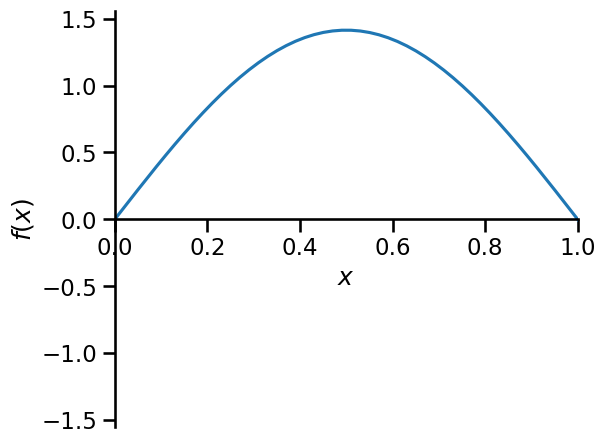

In [53]:
from sympy.plotting import plot

# 可视化基态波函数
plot(psi.subs({l:1}), xlim=(0, 1))

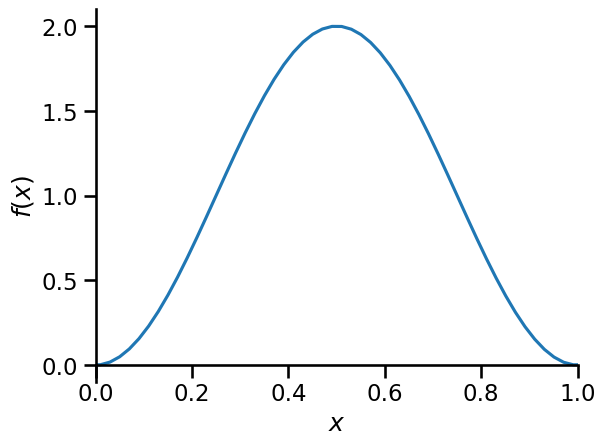

In [54]:
# 可视化粒子数密度 (rho = <psi | psi> )
plot((psi*psi).subs({l:1}), xlim=(0, 1))

In [55]:
## 位置的平均值：积分计算
avg_x = sym.integrate(psi*x*psi, (x, 0, l))

### 化简 simplify 得到平均位置
sym.simplify(avg_x)

l/2

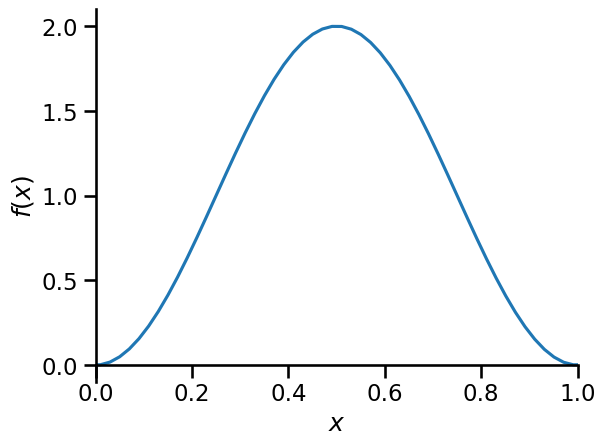

In [56]:
# 可视化粒子数密度 (rho = <psi | psi> )
plot((psi*psi).subs({l:1}), xlim=(0, 1))

In [57]:
## 位置的平均值：积分计算
avg_x = sym.integrate(psi*x*psi, (x, 0, l))

### 化简 simplify 得到平均位置
sym.simplify(avg_x)

l/2

In [58]:
# 检查 sympy 里的虚数符号
sym.I * sym.I

-1

In [59]:
# 检查 sympy 中的微分计算 d psi / dx
sym.diff(psi, x)

sqrt(2)*pi*sqrt(1/l)*cos(pi*x/l)/l

In [60]:
## ## 动量的平均值：微分算子 + 积分计算
hbar = sym.symbols("hbar")

p_rho = psi * (-sym.I * hbar) * sym.diff(psi, x)

avg_p = sym.integrate(p_rho, (x, 0, l))

sym.simplify(avg_p)

0

思考：

如何计算坐标的不确定度 $\langle \Delta x^2 \rangle$ 与动量的不确定度 $\langle \Delta p^2 \rangle$

$\langle \Delta x^2 \rangle =  \langle x^2 \rangle - \langle x \rangle^2$

$\langle \Delta p^2 \rangle =  \langle p^2 \rangle - \langle p \rangle^2$

In [61]:
# 计算坐标的不确定度

avg_x2 = sym.integrate(psi*x*x*psi, (x, 0, l))

sym.simplify(avg_x2)

-l**2/(2*pi**2) + l**2/3

In [62]:
Uncertainty_x = avg_x2 - avg_x
sym.simplify(Uncertainty_x)

-l**2/(2*pi**2) + l**2/3 - l/2

In [63]:
p2_rho = psi * (-sym.I * hbar)**2 * sym.diff(psi, x, 2)

avg_p2 = sym.integrate(p2_rho, (x, 0, l))

sym.simplify(avg_p2)

Piecewise((pi**2*hbar**2/l**2, ((l > -oo) | (l > 0)) & ((l > -oo) | (l < oo)) & ((l > 0) | (l < 0)) & ((l < 0) | (l < oo))), (0, l >= 0))

## 数值积分

在工作中，最常用的python低维度数值积分方法（比如1维、2维数值积分）是`scipy.integrate.simps()`函数和`scipy.integrate.quad()`函数。

举例：可能很多人没意识到，椭圆的周长没有简单的解析公式，只能数值求解，

$${x^2 \over a^2} + {y^2 \over b^2} = 1$$

设方位角为$\theta$, 则椭圆上的任一点的坐标可以用$\theta$表示为:

$$x = a \cos \theta \\
y = b \sin \theta$$

此时椭圆周长的计算公式为:

$$L = \int dl = \int \sqrt{dx^2 + dy^2}\\
= \int_0^{2\pi} \sqrt{({dx \over d\theta})^2 + ({dy \over d\theta})^2} d\theta \\
= \int_0^{2\pi} \sqrt{a^2\sin^2\theta + b^2\cos^2\theta} d\theta$$

In [64]:
from scipy.integrate import quad
# 1 维数值积分用 quad
# 2 维数值积分用 dblquad
# 3 维数值积分用 tplquad
# n 维数值积分用 nquad

#help(quad)

In [65]:
# 验证 sympy 不能给出椭圆周长的解析积分公式
a, b, theta = sym.symbols('a b theta')
L = sym.integrate(sym.sqrt(a**2 * sym.sin(theta)**2 + b**2 * sym.cos(theta)**2), (theta, 0, 2*sym.pi))
sym.simplify(L)

Integral(sqrt(a**2*sin(theta)**2 + b**2*cos(theta)**2), (theta, 0, 2*pi))

In [66]:
def ellipse_circumference(a = 4, b = 3):
    '''计算椭圆周长
    :a: 椭圆长轴长度
    :b: 椭圆短轴长度'''
    f = lambda t: np.sqrt(a**2 * np.sin(t)**2 + b**2 * np.cos(t)**2)
    circum, err = quad(f, 0, 2*np.pi)
    return circum, err

# 首先验证长轴等于短轴时，椭圆周长与圆周长公式相符
circ, err = ellipse_circumference(a=4, b=4)
np.isclose(circ, 2*np.pi * 4)

np.True_

In [67]:
ellipse_circumference(a=4, b=3)

(22.103492160709497, 2.2162729346186794e-08)

In [68]:
## 对比椭圆周长的低阶精度经验公式 L = 2 pi b + 4 (a - b)

def circ_approximate(a, b):
    if b > a: a, b = b, a
    return 2 * np.pi * b + 4 * (a - b)

circ_approximate(a=4, b=3)

22.84955592153876

### 低维数值积分

积分中值定理：

$$\int_a^b{f(x) dx} = (b-a)f(\xi) (\xi \in (a,b))$$

问题转化为如何找到$\xi$

1. 梯形公式：用两端的f(a)和f(b)的平均值作为$f(\xi)$
2. 矩形公式：用a和b的中点对应值$f((a+b)/2)$作为$f(\xi)$
3. 选取适当的(a,b)之间的一些点$x_k$，取$f(x_k)$的加权平均作为高度$f(\xi)$

$$\int_a^b{f(x)}dx \approx \sum_{k=0}^n {A_kf(x_k)}$$

其中$x_k$为求积节点，$A_k$为求积系数。

如果数值求积公式对于任何不高于m次的代数多项式都准确成立，而对m+1次代数多项式不准确成立，则称该求积公式具有m次代数精确度，简称代数精度。

解释：将$f(x)=1, x, x^2, x^3 \cdots x^m$依次带入到积分公式，公式准确成立，而当$x^{m+1}$带入到公式中，公式不再准确成立，则称该数值求积公式具有m次代数精度。

对梯形公式，我们有：

左边：$\int_a^b{1dx}=b-a$，右边：$(b-a)*2/2=b-a$ 0次项成立。

左边：$\int_a^b{xdx}=\frac12 x^2|_a^b = \frac12 (b^2-a^2)$，右边：$(b-a)(b+a)/2=(b^2 - a^2)/2$ 1次项成立。

左边：$\int_a^b{x^2dx}=\frac13 x^3|_a^b = \frac13(b^3-a^3)$，右边：$(b-a)(b^2+a^2)/2=(b^3+a^2b-ab^2-a^3)/2$ 2次项不成立。

梯形公式具有1次代数精度。

对矩形公式，我们有：

左边：$\int_a^b{1dx}=b-a$，右边：$(1*(b-a))=b-a$ 0次项成立。

左边：$\frac12 {b^2-a^2}$，右边：$(a+b)*(b-a)/2=(b^2 - a^2)/2$ 1次项成立。

左边：$\frac13(b^3-a^3)$，右边：$(a+b)^2*(b-a)/4$ 2次项不成立。

选定一组节点，$a \le x_0 \lt x_1 \lt x_2 \lt \cdots \lt x_n \le b$，求插值函数$L_n(x)$，让插值函数代替函数求积分（由于插值函数多为多项式，比较容易找到原函数）。

$$\int_a^b {f(x)dx} \approx \int_a^b {L_n(x)dx}$$

Lagrange 插值函数为：

$$L_n(x) = \sum_{k=0}^n{f(x_k)l_k(x)}$$

其中$l_k(x)$为Lagrange 插值函数的基函数。带入上述公式可以得到：

$$\int_a^b {f(x)dx} = \int_a^b{L_n(x)dx} = \int_a^b\sum_{k=0}^n{f(x_k)l_k(x)dx}=\sum_{k=0}^n\int_a^b{l_k(x)f(x_k)dx}$$

求积系数$A_k=\int_a^b{l_k(x)dx}$

Lagrange插值函数的余项为：

$$R_n(x)=f(x)-L_n(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}\omega_{n+1}(x) \ \xi\in (a,b)$$

其中$\omega(x)=(x-x_0)(x-x_1)\cdots(x-x_n)$。

#### Newton-Cotes公式

$$A_k=\int_a^b{l_k(x)dx}$$

又因为lagrange插值函数的基函数为：

$$l_k(x) = \frac{(x-x_0)\cdots(x-x_{k-1})(x-x_{k+1})\cdots(x-x_n)}{(x_k-x_0)\cdots(x_k-x_{k-1})(x_k-x_{k+1})\cdots(x_k-x_n)}$$

这个基函数很容易理解，要想使拟合的曲线经过$(x_0, f(x_0)),(x_1, f(x_1)),\cdots,(x_k, f(x_k)),\cdots$，上式能够保证，对于$x_k$，在$x=x_k$的时候，$l_k(x)=1$，在$x\neq{x_k}$的时候，$l_k(x)=0$，那么$f(x_k)l_k(x)=f(x_k)$。所以$\sum_k{f_kl_k(x)}$能够经过每一个点。

当我们考虑使用这种方式求数值积分的时候，意味着我们对原本的函数离散化，取了n个点，并用对应的插值函数进行了取代。

$$A_k=\int_a^b{l_k(x)dx}=\int_a^b{\prod_{j=0,j\neq{k}}^n\frac{x-x_j}{x_k-x_j}dx}$$

对于n=2，只有两个节点，这两个节点取积分上下限。有两个求积系数：

$$A_0=\int_a^b{\frac{x-b}{a-b}dx}$$
$$A_1=\int_a^b{\frac{x-a}{b-a}dx}$$

In [69]:
a, b, x = sym.symbols("a b x")

A0 = sym.integrate((x - b)/(a - b), (x, a, b))

A1 = sym.integrate((x - a)/(b - a), (x, a, b))

In [70]:
sym.simplify(A0)

-a/2 + b/2

In [71]:
sym.simplify(A1)

-a/2 + b/2

此时得到一阶 Newton-Cotes 积分公式 -- 梯形公式（上底加 下底，乘高除二等面积）
$\frac{b-a}{2}(f(a)+f(b))$

对于n个节点，使用sympy计算Newton-Cotes积分公式

n=3时候，节点分别是$(x_0,x_1,x_2)=(a,\frac{a+b}{2},b)$。

n=4时候，节点分别是$(x_0,x_1,x_2,x_3)=(a,\frac{2a+b}{3},\frac{a+2b}{3},b)$

对于等距离的n个节点，第k个节点的坐标可以统一为：

$$h=\frac{b-a}{n-1}$$
$$x_k=a+kh$$

In [72]:
def newton_cotes(n=2):
    h = (b - a) / (n - 1)
    nodes = [a + k*h for k in range(n)]

    x = sym.symbols('x')
    
    def elx(k):
        terms = [(x - nodes[j])/(nodes[k] - nodes[j]) 
                 for j in range(n) if j != k]
        
        return sym.prod(terms)
    
    Ak = [sym.integrate(elx(k), (x, a, b)) for k in range(n)]
    
    Ak_s = [sym.simplify(A) for A in Ak]
    
    return nodes, Ak_s

In [73]:
nodes, Ak = newton_cotes(n=3)
Ak

[-a/6 + b/6, -2*a/3 + 2*b/3, -a/6 + b/6]

可以观察到每一项都有(b-a)，提取出来可以得到：
$$\int_a^b{f(x)dx}\approx\sum_{k=0}^n{f(x_k)A_k}=(b-a)\sum_{k=0}^n{f(x_k)C_k}$$
其中$C_k=A_k/(b-a)$

In [74]:
def newton_cotes_coef(n=2):
    '''计算 newton cotes 积分系数 Ck'''
    nodes, Ak = newton_cotes(n=n)
    Ck = [sym.simplify(Ak[k]/(b-a)) for k in range(n)]
    return Ck

newton_cotes_coef(n=3)

[1/6, 2/3, 1/6]

In [75]:
newton_cotes_coef(n=4)

[1/8, 3/8, 3/8, 1/8]

In [76]:
newton_cotes_coef(n=5)

[7/90, 16/45, 2/15, 16/45, 7/90]

3个节点的Newton-Cotes积分对应2阶辛普森公式：
$$F=(b-a)[\frac16f(a)+\frac23f(\frac{a+b}{2})+\frac16f(b)]$$
4个节点的Newton-Cotes积分对应3阶辛普森公式：
$$F=(b-a)[\frac18f(a)+\frac38f(\frac{2a+b}{3})+\frac38\frac{a+2b}{3}+\frac18f(b)]$$
一般而言，不会对整个区域$[a,b]$使用Newton-Cotes公式。而是会将整个积分区间[a,b]划为n等份，在每个子区间$[x_k,x_{k+1}]$使用梯形公式或Simpson公式，然后对所有的子区间求和。这种方法被成为复化梯形公式或复化Simpson公式。

下面这个函数将对给定的函数f(x)实现3阶Simpson数值积分。

In [77]:
def Third_order_Simpson(func, a, b):
    mid = (a+b)/2
    return (b-a)*(func(a)/6+2*func(mid)/3+func(b)/6)
def func(x):
    return (1-x)**0.5
Third_order_Simpson(func,-1,1)

1.804737854124365

In [78]:
x = sym.symbols('x')
xi = sym.sqrt(1-x)
sym.integrate(xi, (x,-1,1))

4*sqrt(2)/3

In [79]:
4*(2**0.5)/3

1.885618083164127

In [80]:
def composite_simpson(func, a, b, n):
    h = (b - a) / n
    total = 0
    for i in range(int(n)):
        total+=Third_order_Simpson(func,a+i*h,a+(i+1)*h)
    return total
    
composite_simpson(func,-1,1,1E5)

1.8856180805968548

#### Gauss Quadrature 高斯积分（不等距积分点的方案）

高斯积分适用于对多项式或近似多项式形式的函数进行数值积分。

考虑一阶多项式函数的高斯积分：
$$f(x)=a_1x+a_0$$
积分结果为：
$$\int_a^b{f(x)dx}=(b-a)*\frac{(f(a)+f(b))}{2}=(b-a)*f(\frac{b+a}{2})$$
符合积分中值定理，$\xi=\frac{a+b}{2}$。
一阶多项式函数高斯积分的积分点为$\frac{a+b}{2}$，权重为$b-a$。此时只用一个高斯点即可获得精确的积分值。上述计算是在[a,b]内进行的，如果我们通过参数变化，将复杂定义域转化到规则的区域上，如：
$$x=\frac{b-a}{2}\eta+\frac{b+a}{2}$$
此时：
$$f(\eta)=a_1(\frac{b-a}{2}\eta+\frac{b+a}{2})+a_0$$
$$\int_a^b{f(x)dx}=\frac{dx}{d\eta}\int_{-1}^{1}f(\eta)d\eta$$
总之，非规则区域的积分只需利用坐标转换的雅可比矩阵即可转化为规则域积分。
在一阶问题中通过一个高斯点获得了完全精度的数值积分，对于二阶多项式，假设我们同样只使用一个高斯点就可以确定完全精度的数值积分：
$$\int_{-1}^1{f(x)dx}=(\frac{1}{3}a_2x^3+\frac{1}{2}a_1x^2+a_0x)|_{-1}^1=\frac23a_2+2a_0$$
设权重为$w_1$，积分点为$x_1$，就会有：$w_1(a_2x_1^2+a_1x_1+a_0)=\frac23+2a_0$，也就意味着:
$$
\begin{cases}
w_1x_1^2 & = \frac23 \\
w_1x_1   & = 0 \\
w_1 & = 2
\end{cases}
$$
这个式子是无解的。假设不成立。但可以继续假设两个高斯积分点，上式能够成立：
$$w_1(a_2x_1^2+a_1x_1+a_0)+w_2(a_2x_2^2+a_1x_2+a_0)=\frac23a_2+2a_0$$
那么有：
$$
\begin{cases}
w_1x_1^2+w_2x_2^2 &= \frac23 \\
w_1x_1+w_2x_2 &= 0 \\
w_1+w_2 &= 2
\end{cases}
$$
上式存在解$w_1=w_2=1$，$x_1=-x_2=\frac{1}{\sqrt{3}}$。
可以发现当取区间[-1,1]的时候，奇数次项由于是奇函数，会出现相互抵消的情况。所以右边不存在$a_1$项。
例如三阶多项式：
$$\int{f(x)dx}=(\frac14a_3x^4+\frac13a_2x^3+\frac12a_1x^2+a_0x)|_{-1}^1=\frac23a_2+2a_0$$
所以和二阶的权重和积分点完全一致。这就是为什么需要利用参数化将积分区间变为[-1,1]上。

考虑公式：

$$\Gamma(\mathrm{T})=\frac{e^{\beta \Delta E_0}}{1 + e^{\frac{2\pi \Delta E_0}{\hbar |\omega_F^\ddagger|}}}
+ \frac{1}{2} \int_{-\infty}^{\frac{\pi \Delta E_0}{\hbar |\omega_F^\ddagger|}} 
d\theta \, e^{\frac{\beta \hbar |\omega_F^\ddagger| \theta}{\pi}} \, \text{sech}^2 \theta$$

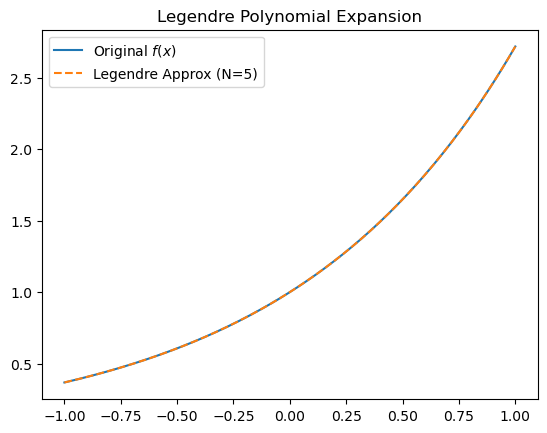

In [1]:
import numpy as np
from scipy.special import legendre
from scipy.integrate import quad
import matplotlib.pyplot as plt

# 目标函数（你可以换成任意函数）
def f(x):
    return np.exp(x)

# 计算第 n 阶勒让德展开系数 a_n
def compute_legendre_coeff(f, n):
    Pn = legendre(n)  # scipy 返回多项式对象（支持 .__call__）
    integrand = lambda x: f(x) * Pn(x)
    integral, _ = quad(integrand, -1, 1)
    return (2*n + 1)/2 * integral

# 展开阶数
N = 5

# 计算所有系数
coeffs = [compute_legendre_coeff(f, n) for n in range(N+1)]

# 用系数重构函数
def legendre_series(x, coeffs):
    return sum(coeffs[n] * legendre(n)(x) for n in range(len(coeffs)))

# 可视化
x_vals = np.linspace(-1, 1, 200)
y_true = f(x_vals)
y_approx = [legendre_series(x, coeffs) for x in x_vals]

plt.plot(x_vals, y_true, label='Original $f(x)$')
plt.plot(x_vals, y_approx, '--', label='Legendre Approx (N=5)')
plt.legend()
plt.title("Legendre Polynomial Expansion")
plt.show()

In [124]:
import numpy as np
from scipy.constants import physical_constants
from scipy.integrate import quad

h = physical_constants["Planck constant"][0]
kB = physical_constants["Boltzmann constant"][0]
e = physical_constants["elementary charge"][0]

def tunneling_correction(T, deltaE0, i_omega, down_limit):
    beta = 1 / T / kB
    i_energy = h * i_omega
    i_energy_eV = i_energy / e # Transform to eV
    #print(f"hbar omega_i = {i_energy}")
    # Term 2
    theta_up_limit = np.pi * deltaE0 / i_energy_eV
    #print(f"integer up limit: {theta_up_limit}")

    def integrand(theta):
        return 0.5 * np.exp(beta * i_energy * theta / np.pi) * (np.cosh(theta)**-2)

    # quad can directly accept the -np.inf as its downlimit.
    result, abserr = quad(integrand, down_limit, theta_up_limit, epsabs=1e-10, epsrel=1e-10)

    #print(f"F = {result:.6e}  error {abserr:.2e}")
    # Surface term
    surf_term = np.exp(beta*deltaE0*e)/(1+np.exp(2*np.pi*deltaE0/i_energy_eV))
    #print(f"surf_term: {surf_term}")
    #print(f"Gamma = {result*surf_term}")
    return result+surf_term, abserr

def crossover_tem(deltaE0, i_omega):
    """
    Calculate the crossover temperature (K).
    """
    i_energy = h * i_omega
    T_c = i_energy * deltaE0 * e / kB / (2 * np.pi * deltaE0 * e - i_energy * np.log(2))
    return T_c

deltaE0 = 0.044
i_omega = 28.358549E12
tunneling_correction(2200, deltaE0, i_omega, -np.inf)

/tmp/ipykernel_18304/2538985926.py:19: RuntimeWarning: overflow encountered in cosh
  return 0.5 * np.exp(beta * i_energy * theta / np.pi) * (np.cosh(theta)**-2)


(np.float64(1.0036359107379944), 1.0523569284565762e-12)